#  Linear Regression Model

## Data Input

In [1]:
import pandas as pd

# Specify the number of rows to skip since the actual data starts after some title and metadata rows
skip_rows = 0

# Columns as provided
columns = [
    "data_id","Voltage (V)", "Current (A)", "Power (W)", "RPM", "Lin Act Pos (Pitch)", 
    "Wind Speed (m/s)", "Resistor (Ohm)", "Torque (uncertain) (oz-in)", 
    "Torque (uncertain) (N-m)", "TSR", "Wind Power (W)", "Cp", "Calc Resistance"
]

# Read the data
data = pd.read_csv('2022data.csv', skiprows=skip_rows, header=0)

# Display the first few rows
print(data.head())
print(data["Voltage (V)"])


   data_id  Voltage (V)  Current (A)  Power (W)   RPM  Lin Act Pos (Pitch)  \
0        1         6.19         1.25     7.7375   943                 1150   
1        2         6.80         1.12     7.6160  1000                 1150   
2        3         6.96         1.15     8.0040  1015                 1160   
3        4         7.02         1.15     8.0730  1020                 1170   
4        5         6.81         1.14     7.7634  1010                 1180   

   Wind Speed (m/s)  Resistor (Ohm) Torque (uncertain) (oz-in)  \
0               7.0            4.80                        NaN   
1               7.0            5.83                        NaN   
2               7.0            5.83                        NaN   
3               7.0            5.83                        NaN   
4               7.0            5.83                        NaN   

   Torque (uncertain) (N-m)       TSR  Wind Power (W)        Cp  \
0                  0.078354  3.103594       31.396833  0.246442   


## Data Cleaning
****

In [2]:

# Splitting the dataset into training and testing data
X = data.drop("Wind Speed (m/s)", axis=1)  # Features (all columns except the target column)
X = X.drop("Torque (uncertain) (oz-in)", axis = 1).drop("data_id",axis=1)
y = data["Wind Speed (m/s)"]               # Target


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the wind speed for the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error for our predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the model's coefficients
print("Coefficients:", model.coef_)

Mean Squared Error: 0.0001859531550259954
Coefficients: [ 6.63280434e-02  3.52912203e-01 -1.65099790e-01  3.21003400e-03
  1.30692780e-03  4.07442912e-02  2.27657596e+01 -5.02575017e-01
  2.98364691e-02 -2.01625346e+00 -5.01216297e-02]


## Matplotlib ploting

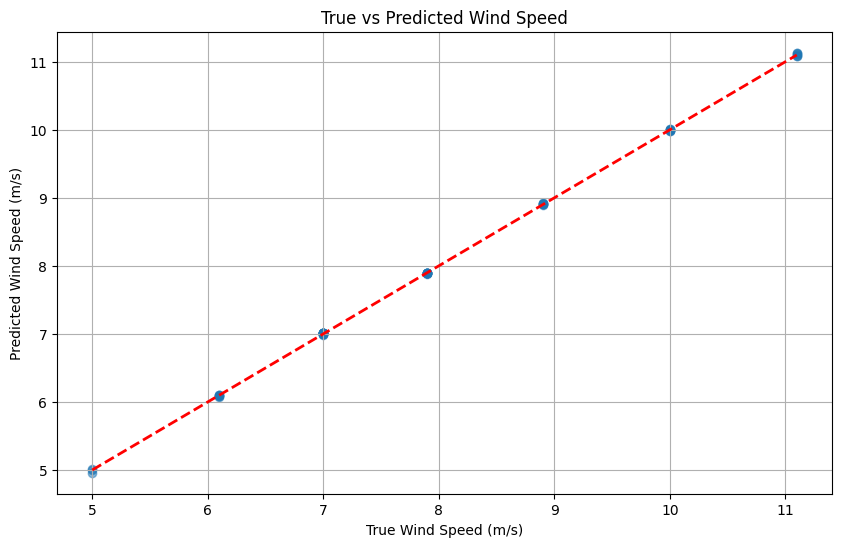

In [4]:
import matplotlib.pyplot as plt

# Assuming you've trained your model and made predictions as follows:
# y_pred = model.predict(X_test)

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('True Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('True vs Predicted Wind Speed')
plt.grid(True)
plt.show()
